In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 
#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score,roc_curve
from sklearn.cluster import KMeans
import time
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [60]:
df = pd.read_csv('/Users/houhiroshisakai/Desktop/Schulich/MBAN 6110 S - Data Science I/conversion_data.csv')

In [61]:
df

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1996,Europe,organic,F,3,0,0,4,2,...,22,51,44,29,5,1,5,7,7,0
1996,1996,1997,South America,google,M,1,2,0,4,1,...,54,33,59,38,1,6,6,7,6,0
1997,1997,1998,Asia,facebook,M,2,3,0,0,8,...,32,30,48,38,2,1,7,6,4,0
1998,1998,1999,South America,youtube,F,2,2,2,5,5,...,21,51,41,56,6,4,2,2,3,1


In [62]:
#Check Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [63]:
# Count the number of missing values in each column of the dataframe
df.isnull().sum()

Unnamed: 0           0
visitor_id           0
visitor_location     0
marketing_channel    0
gender               0
product_views_Mon    0
product_views_Tue    0
product_views_Wed    0
product_views_Thu    0
product_views_Fri    0
avg_rating_Mon       0
avg_rating_Tue       0
avg_rating_Wed       0
avg_rating_Thu       0
avg_rating_Fri       0
avg_price_Mon        0
avg_price_Tue        0
avg_price_Wed        0
avg_price_Thu        0
avg_price_Fri        0
time_on_site_Mon     0
time_on_site_Tue     0
time_on_site_Wed     0
time_on_site_Thu     0
time_on_site_Fri     0
pages_visited_Mon    0
pages_visited_Tue    0
pages_visited_Wed    0
pages_visited_Thu    0
pages_visited_Fri    0
converted_Fri        0
dtype: int64

In [64]:
##Drop Duplicate
df.drop_duplicates(inplace=True)

In [65]:
##Double-Check after cleanning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [66]:
df.describe()

,Unnamed: 0,visitor_id,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,avg_rating_Wed,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,1000.500000,2.541500,2.440500,2.441000,2.256500,2.354000,3.023990,3.042760,2.970885,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,1.704914,1.715206,2.343345,2.370974,2.335682,1.151037,1.154019,1.148805,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,0.000000,0.000000,0.000000,-4.000000,-3.000000,1.000000,1.000000,1.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,1.000000,1.000000,0.000000,0.000000,0.000000,2.017500,2.057500,1.970000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,3.000000,2.000000,2.000000,2.000000,2.000000,3.055000,3.080000,2.965000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,4.000000,4.000000,4.000000,5.000000,5.000000,4.022500,4.030000,3.960000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000
max,1999.000000,2000.000000,5.000000,5.000000,9.000000,8.000000,8.000000,5.000000,5.000000,4.990000,...,60.000000,60.000000,60.000000,60.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000


In [67]:
#Identify the features' characteristcs.
unique_counts = df.nunique()
print(unique_counts)


Unnamed: 0           2000
visitor_id           2000
visitor_location        5
marketing_channel       5
gender                  2
product_views_Mon       6
product_views_Tue       6
product_views_Wed      10
product_views_Thu      13
product_views_Fri      12
avg_rating_Mon        397
avg_rating_Tue        397
avg_rating_Wed        397
avg_rating_Thu        399
avg_rating_Fri        398
avg_price_Mon        1739
avg_price_Tue        1782
avg_price_Wed        1785
avg_price_Thu        1785
avg_price_Fri        1761
time_on_site_Mon       41
time_on_site_Tue       41
time_on_site_Wed       41
time_on_site_Thu       41
time_on_site_Fri       41
pages_visited_Mon       7
pages_visited_Tue       7
pages_visited_Wed       7
pages_visited_Thu       7
pages_visited_Fri       7
converted_Fri           2
dtype: int64


In [68]:
print(df['visitor_location'].unique())

['North America' 'South America' 'Australia' 'Asia' 'Europe']


In [69]:
print(df['marketing_channel'].unique())

['youtube' 'organic' 'instagram' 'facebook' 'google']


In [70]:
print(df['gender'].unique())

['M' 'F']


In [71]:
##Feature Engineering// Dummies
location_mapping = {'North America':1, 'South America':2,'Australia':3,'Asia':4,'Europe':5}
df['visitor_location'] = df['visitor_location'].map(location_mapping)

In [72]:
print(df['visitor_location'].unique())

[1 2 3 4 5]


In [73]:
##Feature Engineering// Dummies
channel_mapping = {'youtube':1, 'organic':2,'instagram':3,'facebook':4,'google':5}
df['marketing_channel'] = df['marketing_channel'].map(channel_mapping)

In [74]:
print(df['marketing_channel'].unique())

[1 2 3 4 5]


In [75]:
##Feature Engineering// Dummies
gender_mapping = {'M':1, 'F':2}
df['gender'] = df['gender'].map(gender_mapping)

In [76]:
print(df['gender'].unique())

[1 2]


In [77]:
#Integrate groups by weekly
df['product_views_week'] = df[['product_views_Mon','product_views_Tue','product_views_Wed','product_views_Thu','product_views_Fri']].sum(axis=1)
df['avg_rating_week'] = df[['avg_rating_Mon','avg_rating_Tue','avg_rating_Wed','avg_rating_Thu','avg_rating_Fri']].sum(axis=1)
df['avg_rating_week'] = df[['avg_rating_Mon','avg_rating_Tue','avg_rating_Wed','avg_rating_Thu','avg_rating_Fri']].sum(axis=1)
df['avg_price_week'] = df[['avg_price_Mon','avg_price_Tue','avg_price_Wed','avg_price_Thu','avg_price_Fri']].sum(axis=1)
df['time_on_site_week'] = df[['time_on_site_Mon','time_on_site_Tue','time_on_site_Wed','time_on_site_Thu','time_on_site_Fri']].sum(axis=1)
df['pages_visited_week'] = df[['pages_visited_Mon','pages_visited_Tue','pages_visited_Wed','pages_visited_Thu','pages_visited_Fri']].sum(axis=1)


In [78]:
#Create new dataframe for prediction
df_pred = df[['visitor_location','marketing_channel','gender','product_views_week','avg_rating_week','avg_price_week','time_on_site_week','pages_visited_week','converted_Fri']]

In [79]:
#Check dataframe
df_pred

,visitor_location,marketing_channel,gender,product_views_week,avg_rating_week,avg_price_week,time_on_site_week,pages_visited_week,converted_Fri
0,1,1,1,14,15.67,273.69,216,24,1
1,2,2,2,13,10.34,357.16,166,26,0
2,3,3,1,9,18.33,321.79,144,12,1
3,1,4,1,6,16.50,280.24,186,22,0
4,4,3,2,13,11.82,232.21,223,23,1
...,...,...,...,...,...,...,...,...,...
1995,5,2,2,9,15.04,286.30,178,25,0
1996,2,5,1,8,9.29,228.51,228,26,0
1997,4,4,1,13,16.40,262.72,174,20,0
1998,2,1,2,16,18.31,258.76,189,17,1


In [80]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitor_location    2000 non-null   int64  
 1   marketing_channel   2000 non-null   int64  
 2   gender              2000 non-null   int64  
 3   product_views_week  2000 non-null   int64  
 4   avg_rating_week     2000 non-null   float64
 5   avg_price_week      2000 non-null   float64
 6   time_on_site_week   2000 non-null   int64  
 7   pages_visited_week  2000 non-null   int64  
 8   converted_Fri       2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


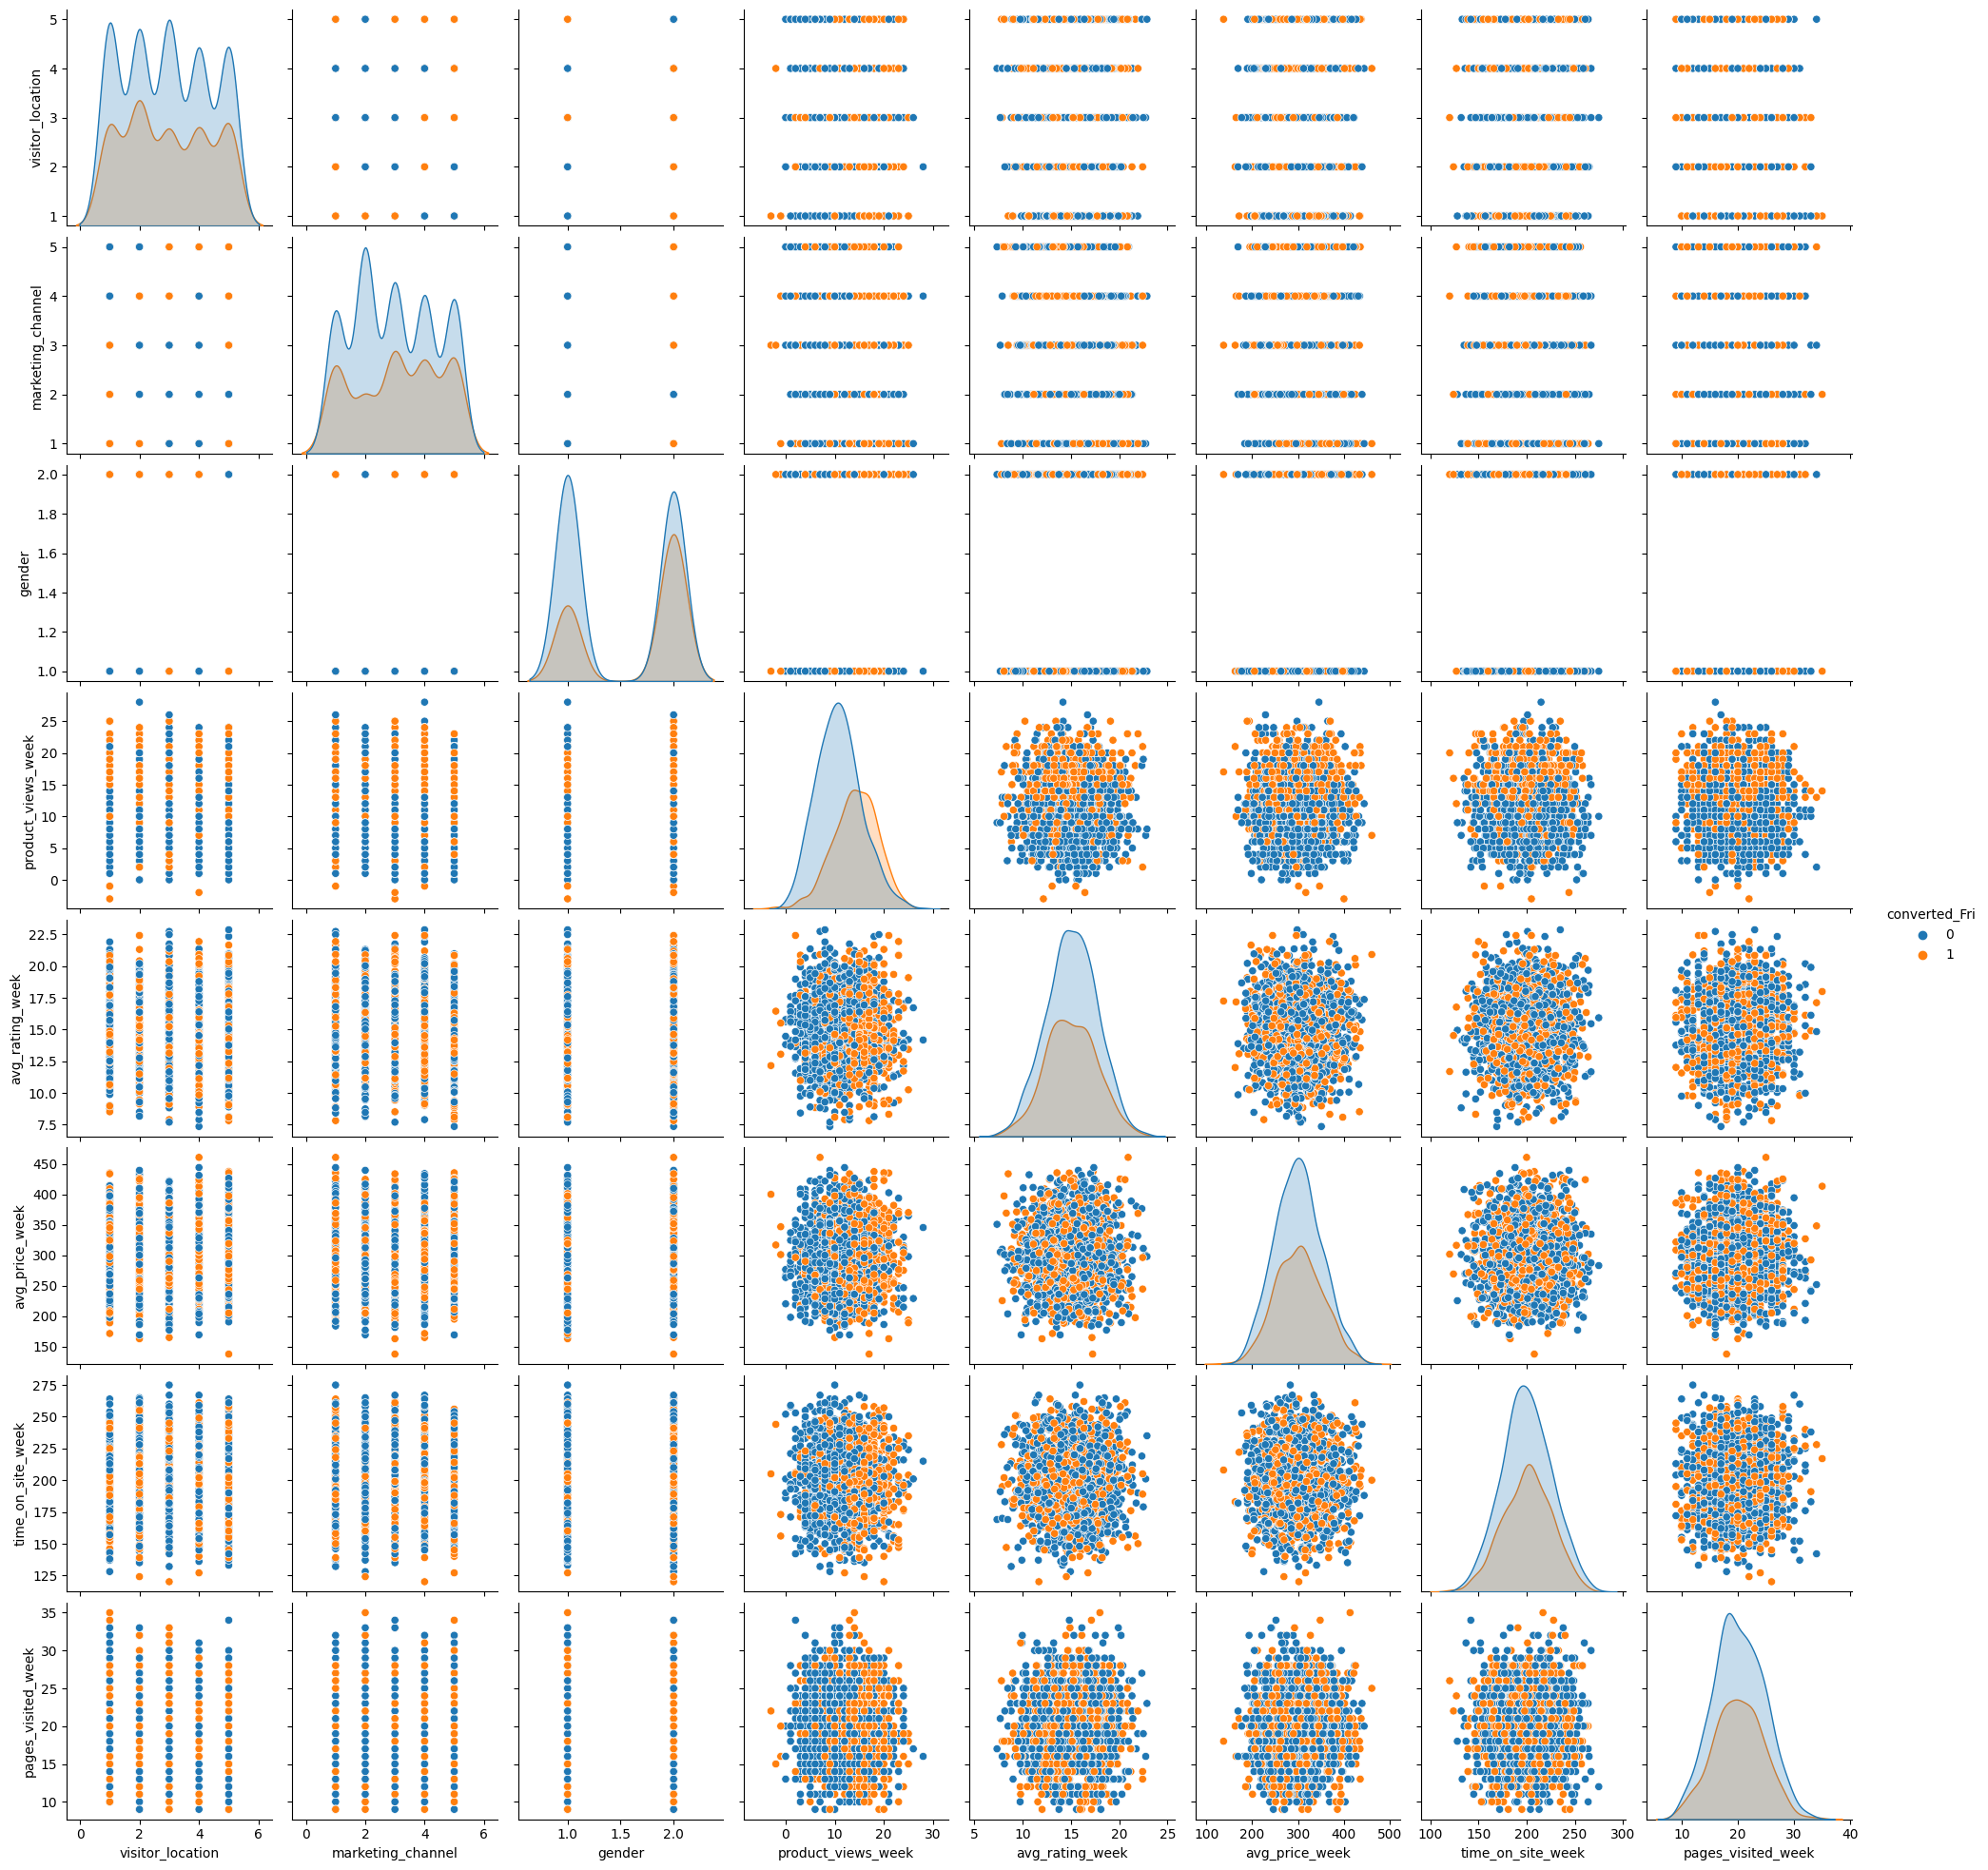

In [81]:
sns.pairplot(df_pred, hue = 'converted_Fri')

<Axes: xlabel='converted_Fri', ylabel='pages_visited_week'>

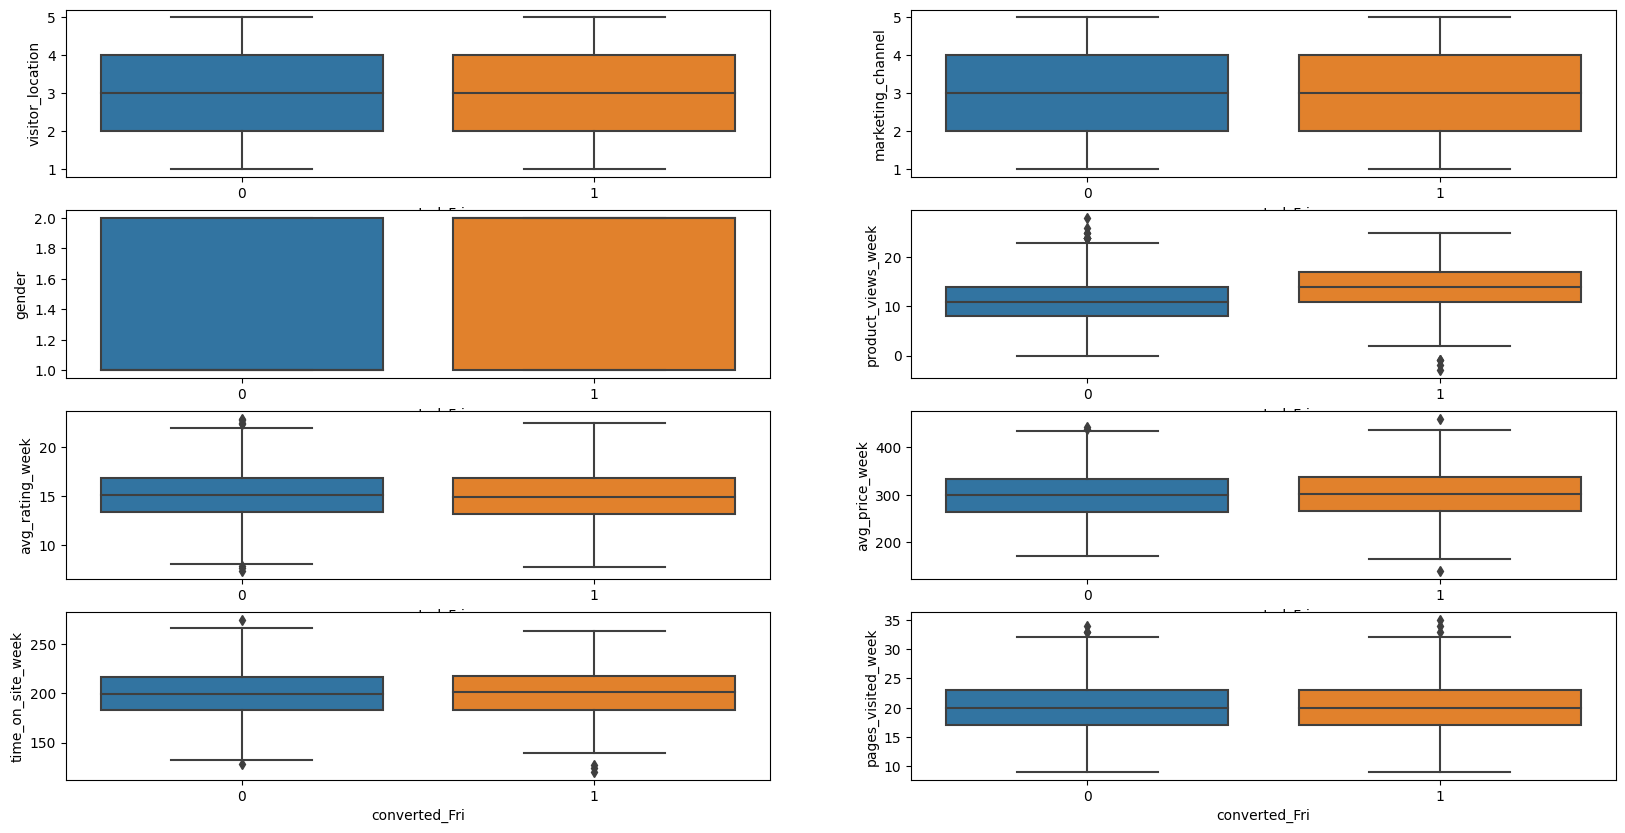

In [82]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2, figsize=(20,10))
sns.boxplot(x='converted_Fri', y='visitor_location', ax=ax1, data=df_pred)
sns.boxplot(x='converted_Fri', y='marketing_channel', ax=ax2, data=df_pred)
sns.boxplot(x='converted_Fri', y='gender', ax=ax3, data=df_pred)
sns.boxplot(x='converted_Fri', y='product_views_week', ax=ax4, data=df_pred)
sns.boxplot(x='converted_Fri', y='avg_rating_week', ax=ax5, data=df_pred)
sns.boxplot(x='converted_Fri', y='avg_price_week', ax=ax6, data=df_pred)
sns.boxplot(x='converted_Fri', y='time_on_site_week', ax=ax7, data=df_pred)
sns.boxplot(x='converted_Fri', y='pages_visited_week', ax=ax8, data=df_pred)

In [83]:
##Initial hyphothesis --> only product views counted by week is important

In [84]:
##Split into 3 groups, they are converted_group & not_converted_group
df_converted_fri_location = df_pred[df_pred['converted_Fri'] == 1]['visitor_location']
df_not_converted_fri_location = df_pred[df_pred['converted_Fri'] == 0]['visitor_location']
##Channel
df_converted_fri_channel = df_pred[df_pred['converted_Fri'] == 1]['marketing_channel']
df_not_converted_fri_channel = df_pred[df_pred['converted_Fri'] == 0]['marketing_channel']
##Average Rating
df_converted_fri_avg_rating = df_pred[df_pred['converted_Fri'] == 1]['avg_rating_week']
df_not_converted_fri_avg_rating = df_pred[df_pred['converted_Fri'] == 0]['avg_rating_week']
##Average Price
df_converted_fri_avg_price = df_pred[df_pred['converted_Fri'] == 1]['avg_price_week']
df_not_converted_fri_avg_price = df_pred[df_pred['converted_Fri'] == 0]['avg_price_week']
##Time on site
df_converted_fri_time_on_site = df_pred[df_pred['converted_Fri'] == 1]['time_on_site_week']
df_not_converted_fri_time_on_site = df_pred[df_pred['converted_Fri'] == 0]['time_on_site_week']
##Pages Visited
df_converted_fri_pages_visited = df_pred[df_pred['converted_Fri'] == 1]['pages_visited_week']
df_not_converted_fri_pages_visited = df[df_pred['converted_Fri'] == 0]['pages_visited_week']

In [85]:
from scipy import stats
t_stat_location_converted, p_val_location_converted = stats.ttest_ind(df_converted_fri_location,df_not_converted_fri_location)
print(f"T-statistic: {t_stat_location_converted}")
print(f"P-value: {p_val_location_converted}")

T-statistic: 0.3734195697943143
P-value: 0.7088758119806735


In [86]:
t_stat_channel_converted, p_val_channel_converted = stats.ttest_ind(df_converted_fri_channel,df_not_converted_fri_channel)
print(f"T-statistic: {t_stat_channel_converted}")
print(f"P-value: {p_val_channel_converted}")

T-statistic: 2.2132347576473914
P-value: 0.026994084047498465


In [87]:
t_stat_rating_converted, p_val_rating_converted = stats.ttest_ind(df_converted_fri_avg_rating,df_not_converted_fri_avg_rating)
print(f"T-statistic: {t_stat_rating_converted}")
print(f"P-value: {p_val_rating_converted}")

T-statistic: -0.4631896508675298
P-value: 0.643278880843684


In [88]:
t_stat_price_converted, p_val_price_converted = stats.ttest_ind(df_converted_fri_avg_price,df_not_converted_fri_avg_price)
print(f"T-statistic: {t_stat_price_converted}")
print(f"P-value: {p_val_price_converted}")

T-statistic: 1.0665731710974906
P-value: 0.286293481043112


In [89]:
t_stat_tos_converted, p_val_tos_converted = stats.ttest_ind(df_converted_fri_time_on_site,df_not_converted_fri_time_on_site)
print(f"T-statistic: {t_stat_tos_converted}")
print(f"P-value: {p_val_tos_converted}")

T-statistic: 0.31419063058798796
P-value: 0.7534090601778787


In [90]:
t_stat_pv_converted, p_val_pv_converted = stats.ttest_ind(df_converted_fri_pages_visited,df_not_converted_fri_pages_visited)
print(f"T-statistic: {t_stat_pv_converted}")
print(f"P-value: {p_val_pv_converted}")

T-statistic: -0.5065028425975092
P-value: 0.6125595806140802


In [91]:
#Refine hyphothesis-->##Initial hyphothesis --> product views counted by week and channel are important

In [92]:
# separate features and target
categorical_features = ['marketing_channel']
numerical_features = ['product_views_week']
target = ['converted_Fri']

In [93]:
##Split Train and Test Data
from sklearn.preprocessing import StandardScaler
X = df_pred[categorical_features + numerical_features]
y = df_pred[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
##Looking for which prediction model is the best
knn = KNeighborsClassifier()
log = LogisticRegression()
nb = GaussianNB()
svc = SVC(kernel='linear')

In [95]:
knn.fit(X_train, y_train)
log.fit(X_train, y_train)
nb.fit(X_train, y_train)
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [96]:
pred_knn = knn.predict(X_test)
pred_log = log.predict(X_test)
pred_nb = nb.predict(X_test)
pred_sv = svc.predict(X_test)

In [97]:
print(f1_score(pred_knn,y_test))
print(f1_score(pred_log,y_test))
print(f1_score(pred_nb,y_test))
print(f1_score(pred_sv,y_test))


0.5523012552301256
0.5145888594164456
0.5171503957783641
0.4679665738161559


In [98]:
# Create KNN model with number of neighbors I set
knn = KNeighborsClassifier(n_neighbors=5)

# Train KNN model
knn.fit(X_train_scaled, y_train.values.ravel())

KNeighborsClassifier()

In [99]:
# Create KNN model with number of neighbors I set
knn = KNeighborsClassifier(n_neighbors=5)

# Train KNN model
knn.fit(X_train_scaled, y_train.values.ravel())

pred_knn = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_knn))
print("Precision:", precision_score(y_test, pred_knn))
print("Recall:", recall_score(y_test, pred_knn))
print("F1 Score:", f1_score(y_test, pred_knn))

conf_matrix = confusion_matrix(y_test, pred_knn)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.6583333333333333
Precision: 0.5602094240837696
Recall: 0.4692982456140351
F1 Score: 0.5107398568019093
Confusion Matrix:
 [[288  84]
 [121 107]]


In [100]:
recall = []

for a in range(1,100):
        
    knn = KNeighborsClassifier(n_neighbors = a)
    knn.fit(X_train, y_train)
    pred_knn = knn.predict(X_test)
    # print(f1_score(y_pred, y_test))
    recall.append(accuracy_score(pred_knn, y_test))

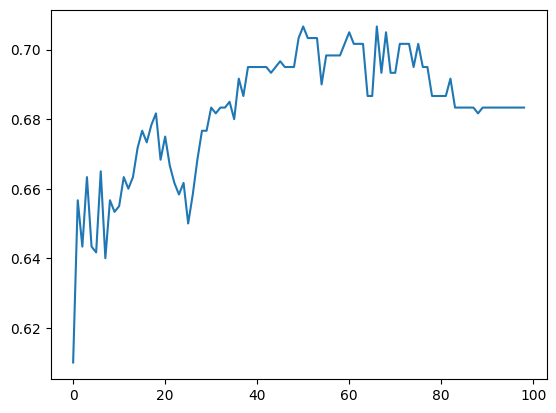

In [101]:
plt.plot(recall)

In [102]:
fpr, tpr, tresholds = roc_curve(y_test,pred_knn)

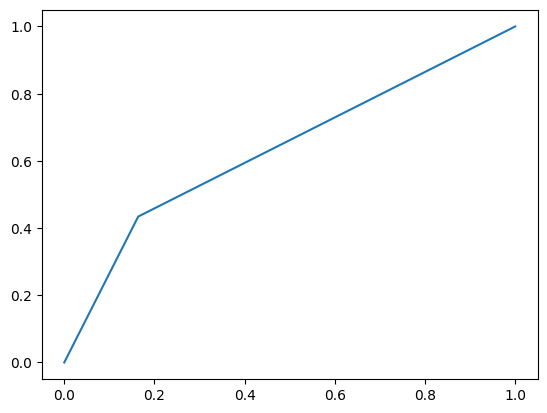

In [103]:
plt.plot(fpr,tpr)

In [104]:
recall_log = []

for a in range(1,100):
        
    log = LogisticRegression()
    log.fit(X_train, y_train)
    pred_log = log.predict(X_test)
    # print(f1_score(y_pred, y_test))
    recall.append(accuracy_score(pred_log, y_test))

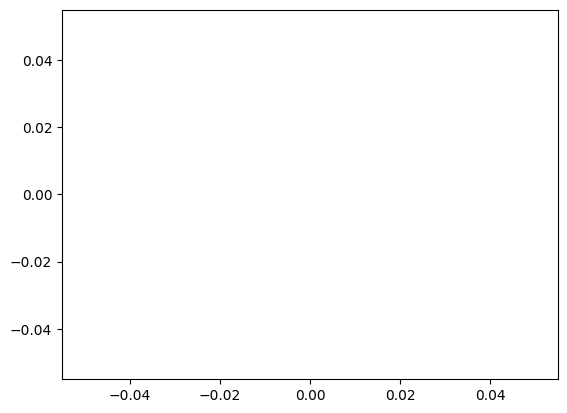

In [105]:
plt.plot(recall_log)

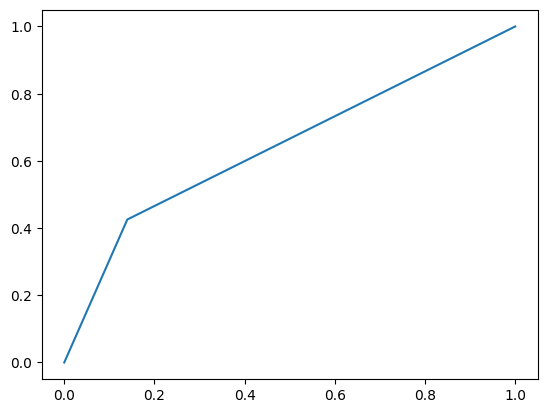

In [106]:
fpr_log, tpr_log, tresholds_log = roc_curve(y_test,pred_log)
plt.plot(fpr_log,tpr_log)

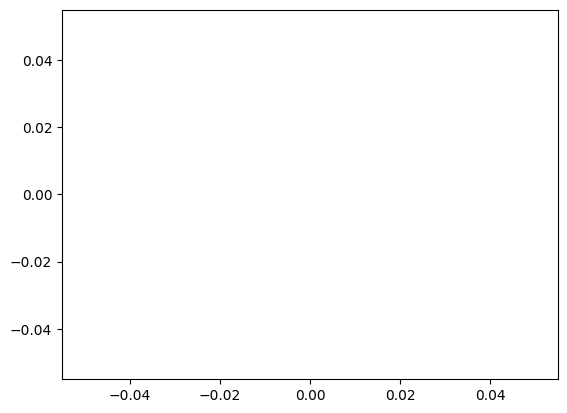

In [107]:
recall_svc = []

for a in range(1,100):
        
    svc = SVC(kernel='linear')
    svc.fit(X_train, y_train)
    pred_svc = svc.predict(X_test)
    # print(f1_score(y_pred, y_test))
    recall.append(accuracy_score(pred_svc, y_test))

plt.plot(recall_svc)

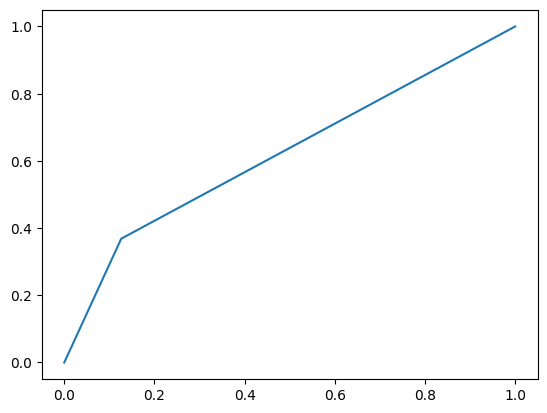

In [108]:
fpr_svc, tpr_svc, tresholds_svc = roc_curve(y_test,pred_svc)
plt.plot(fpr_svc,tpr_svc)

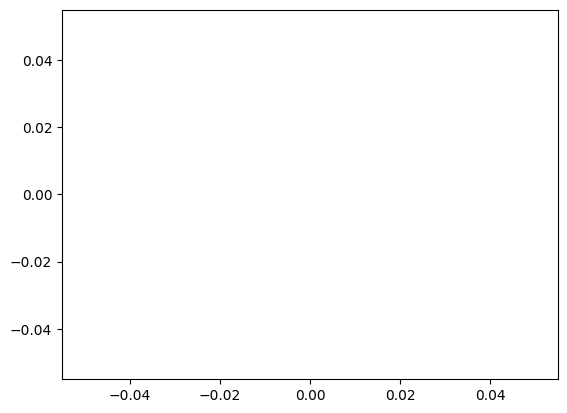

In [109]:
recall_svc = []

for a in range(1,100):
        
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    pred_nb = svc.predict(X_test)
    # print(f1_score(y_pred, y_test))
    recall.append(accuracy_score(pred_nb, y_test))

plt.plot(recall_svc)

PR curve and ROC curve did not perform well, so there is necessary to optimize KNN

In [110]:
# Create KNN model with number of neighbors I set
knn = KNeighborsClassifier(n_neighbors=5)

# Train KNN model
knn.fit(X_train_scaled, y_train.values.ravel())

pred_knn = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_knn))
print("Precision:", precision_score(y_test, pred_knn))
print("Recall:", recall_score(y_test, pred_knn))
print("F1 Score:", f1_score(y_test, pred_knn))

conf_matrix = confusion_matrix(y_test, pred_knn)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.6583333333333333
Precision: 0.5602094240837696
Recall: 0.4692982456140351
F1 Score: 0.5107398568019093
Confusion Matrix:
 [[288  84]
 [121 107]]


In [111]:
#Looking for the best parameters through GridSearchCV
param_knn = {
    'n_neighbors': list(range(1,100)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

randomsearch_nb = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5, scoring='roc_auc')
randomsearch_nb.fit(X_train_scaled, y_train)

print("Best Parameters:", randomsearch_nb.best_params_)

best_knn = randomsearch_nb.best_estimator_

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 95, 'weights': 'uniform'}


In [112]:
y_pred_best = best_knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", conf_matrix_best)

Accuracy: 0.705
Precision: 0.6473988439306358
Recall: 0.49122807017543857
F1 Score: 0.5586034912718205
Confusion Matrix:
 [[311  61]
 [116 112]]


In [113]:
fpr, tpr, tresholds = roc_curve(y_test,y_pred_best)

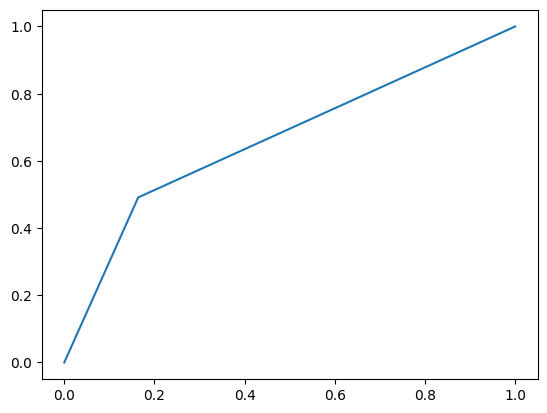

In [114]:
plt.plot(fpr,tpr)

Based on coding, I look for the number of missing value and drop the duplicate, but it seems like there is no null value and duplicate in the dataframe. I used dummies to convert "visitor_location","marketing_channel", and "gender".
Furtheremore, I think it is better to groupby several columns as "weekly groups"such as avg_price, avg_rating, time_on_site etc. 
It will be easier to process the data. 

After finish data cleaning and feature engineering, I draw boxplots for all features that can influence "converted_Fri"; however, there is only product views counted by week has impact on it. So, the initial hyphothesis is "only 'product_views_week' influence the target variables."
After looking for p value between each variable and target variable, the hyphothesis is defined as "product views counted by week and channel are important"

According to the comparison of f1-score, PR curve and ROC curve among KNN, Logistic Regression, GaussianNB, and SVM, all of them are unexpected low, but KNN has the greater score, and it perform better than other three. Therefore, I choose KNN to make a prediction model.

In order to perform the best model, I adjust the parameters to the best. Even if the result is better than previous one, the performance are weak to prove these features can influence "converted_Fri" significantly.

In conclusion, marketing_channel and product_views can determine if the customer converted on Friday; however, the accuracy, f1-score, PR curve, ROC curve etc. shows that the result may not be expected. Tracking the marketing channels and the number of product views can help the company make some strategies in these two fields, but the company need to keep looking for other potential factors.
